In [263]:
import pandas as pd


In [264]:
house1=pd.read_csv("housing.csv")
house1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [265]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [266]:
house1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [267]:
house1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [268]:
house1['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

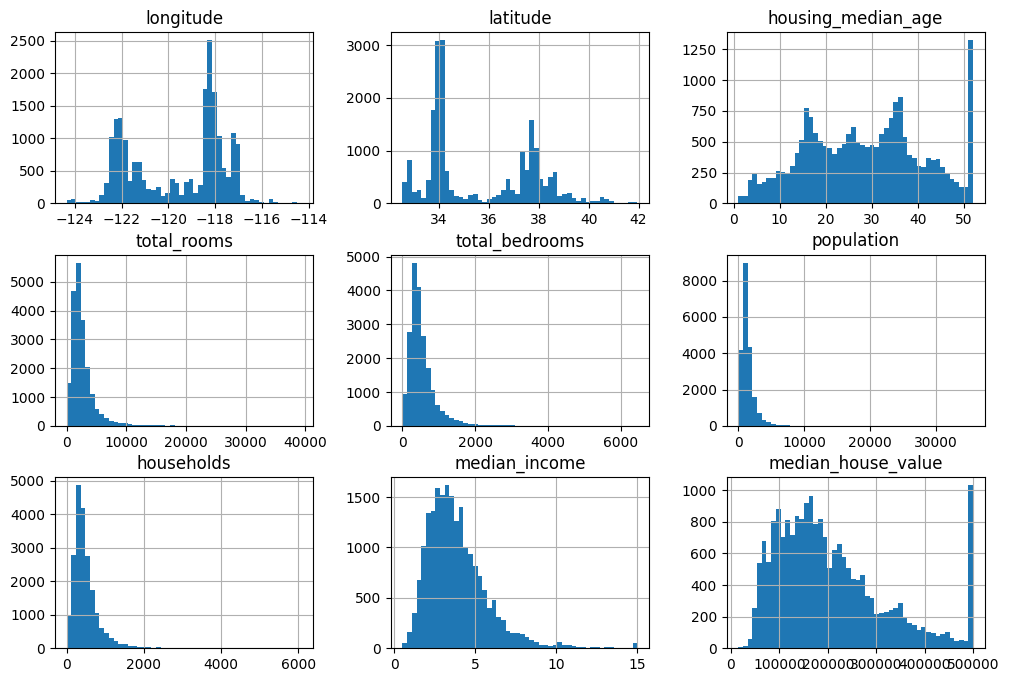

In [269]:
import matplotlib.pyplot as plt
house1.hist(bins=50,figsize=(12,8))
plt.show()

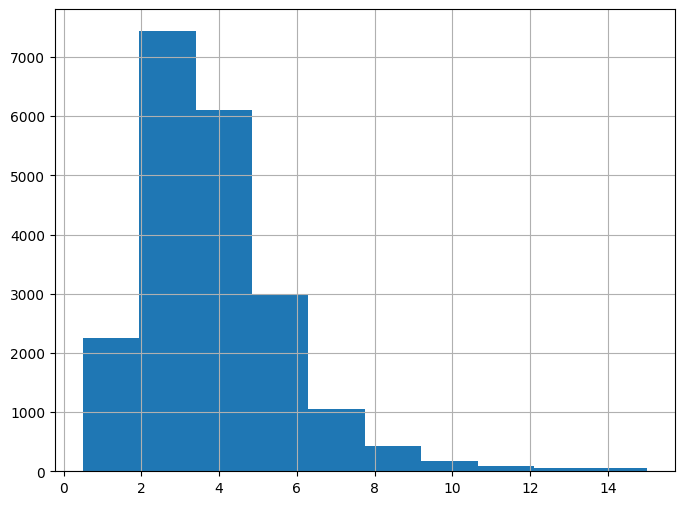

In [270]:
### this is show the median_income has outlier before  1.5 and after 6 so it will be categorized
house1['median_income'].hist(figsize=(8,6))
plt.show()


In [271]:
"""
Creates a new column income_cat by binning median_income into 5 categories (1 to 5).

pd.cut() splits continuous data into intervals or bins.

The bins argument defines the ranges of income:

[0., 1.5) → category 1

[1.5, 3.0) → category 2

[3.0, 4.5) → category 3

[4.5, 6.0) → category 4

[6.0, ∞) → category 5
"""
import numpy as np
house1['median_income_categories']=pd.cut(house1['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
house1['median_income_categories'].value_counts()

median_income_categories
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [272]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(house1,stratify=house1['median_income_categories'],train_size=0.8,random_state=42)
print(train.shape)
print(test.shape)

(16512, 11)
(4128, 11)


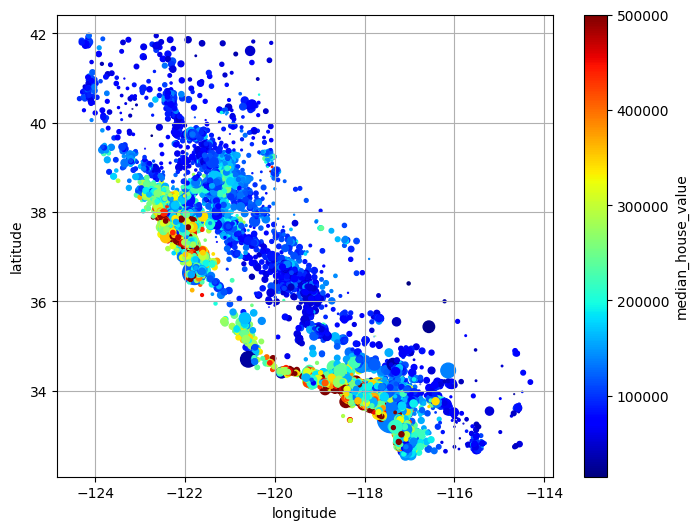

In [273]:
house1.plot(kind='scatter',y='latitude',x='longitude',s=house1['population']/100,c='median_house_value',colormap="jet",figsize=(8,6),grid=True)
plt.show()

In [274]:
house1.dtypes

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity               object
median_income_categories    category
dtype: object

In [275]:
train_prepared=house1.select_dtypes(include=np.number) ## housing without categorical columns 

In [276]:
corMax=train_prepared.corr()
corMax

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [277]:
corMax['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [278]:
#from  the previous correlation some stand  alone features has not affect so we will converet them 
train_prepared["rooms_per_house"] = train_prepared["total_rooms"] / train_prepared["households"]
train_prepared["bedrooms_ratio"] = train_prepared["total_bedrooms"] / train_prepared["total_rooms"]
train_prepared["people_per_house"] = train_prepared["population"] / train_prepared["households"]

In [279]:
train_prepared.shape

(20640, 12)

In [280]:
train_prepared.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'],
      dtype='object')

In [281]:
new_Corr=train_prepared.corr()
new_Corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

### Splitting Data into features and labels

In [282]:
houseCopy=train_prepared.copy()
houseCopy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


In [283]:
houseLabel=train_prepared['median_house_value'].copy()

In [284]:
houseFeatures=train_prepared.drop("median_house_value",axis=1)

In [285]:
houseFeatures.shape

(20640, 11)

### Data Cleaning

In [286]:
houseFeatures.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
rooms_per_house         0
bedrooms_ratio        207
people_per_house        0
dtype: int64

In [287]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')

In [288]:
X=imputer.fit_transform(houseFeatures)

In [289]:
X

array([[-122.23      ,   37.88      ,   41.        , ...,    6.98412698,
           0.14659091,    2.55555556],
       [-122.22      ,   37.86      ,   21.        , ...,    6.23813708,
           0.15579659,    2.10984183],
       [-122.24      ,   37.85      ,   52.        , ...,    8.28813559,
           0.12951602,    2.80225989],
       ...,
       [-121.22      ,   39.43      ,   17.        , ...,    5.20554273,
           0.21517303,    2.3256351 ],
       [-121.32      ,   39.43      ,   18.        , ...,    5.32951289,
           0.21989247,    2.12320917],
       [-121.24      ,   39.37      ,   16.        , ...,    5.25471698,
           0.22118492,    2.61698113]], shape=(20640, 11))

In [290]:
X_df=pd.DataFrame(X,columns=houseFeatures.columns,index=houseFeatures.index)
X_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209


In [291]:
X_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
rooms_per_house       0
bedrooms_ratio        0
people_per_house      0
dtype: int64

### handel  the categorical attibutes (take the copy of training data )

# ######### the work is considered start from here ############ 

## المفروض نقسم ل ترين وتيست وناخد نسخه من الترين وبعدين بدأ عملياتنا على الترين 

In [292]:
trainCopy=train.copy()

In [293]:
train.isnull().sum()


longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              168
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
median_income_categories      0
dtype: int64

#### we will separate numerical data and catergorica data apply what they need then combine them using  pd.concat 

In [ ]:
train_num=train.select_dtypes(include=np.number)
train_cat=train.select_dtypes(include=["object", "category"])

In [295]:
train_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [296]:
train_cat.columns

Index(['ocean_proximity', 'median_income_categories'], dtype='object')

### fill null of the categorical 

In [297]:
train_num.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [298]:
nonNull=pd.DataFrame(imputer.fit_transform(train_num),columns=train_num.columns)

In [299]:
nonNull.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [300]:
## categories of ocean column
train_cat['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7274
INLAND        5301
NEAR OCEAN    2089
NEAR BAY      1846
ISLAND           2
Name: count, dtype: int64

In [301]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
encoded=pd.DataFrame(enc.fit_transform(train_cat).toarray(),columns=enc.get_feature_names_out(train_cat.columns))
encoded.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_categories_1,median_income_categories_2,median_income_categories_3,median_income_categories_4,median_income_categories_5
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [302]:
train_prepared=pd.concat([nonNull,encoded],axis=1)

In [303]:
train_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_categories_1,median_income_categories_2,median_income_categories_3,median_income_categories_4,median_income_categories_5
0,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## we need to do feature enigineering 
seeing the correlation to deduce new features


In [304]:
corMatx=train_prepared.corr()

In [305]:
corMatx['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688380
median_income_categories_5    0.534017
ocean_proximity_<1H OCEAN     0.257132
median_income_categories_4    0.204843
ocean_proximity_NEAR BAY      0.166398
ocean_proximity_NEAR OCEAN    0.138747
total_rooms                   0.137455
housing_median_age            0.102175
households                    0.071426
total_bedrooms                0.054380
ocean_proximity_ISLAND        0.023258
population                   -0.020153
median_income_categories_3   -0.044018
longitude                    -0.050859
latitude                     -0.139584
median_income_categories_1   -0.167828
median_income_categories_2   -0.416854
ocean_proximity_INLAND       -0.485070
Name: median_house_value, dtype: float64

In [306]:
train_prepared["rooms_per_house"] = train_prepared["total_rooms"] / train_prepared["households"]
train_prepared["bedrooms_ratio"] = train_prepared["total_bedrooms"] / train_prepared["total_rooms"]
train_prepared["people_per_house"] = train_prepared["population"] / train_prepared["households"]

In [307]:
corMatx=train_prepared.corr()
corMatx['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688380
median_income_categories_5    0.534017
ocean_proximity_<1H OCEAN     0.257132
median_income_categories_4    0.204843
ocean_proximity_NEAR BAY      0.166398
rooms_per_house               0.143663
ocean_proximity_NEAR OCEAN    0.138747
total_rooms                   0.137455
housing_median_age            0.102175
households                    0.071426
total_bedrooms                0.054380
ocean_proximity_ISLAND        0.023258
population                   -0.020153
people_per_house             -0.038224
median_income_categories_3   -0.044018
longitude                    -0.050859
latitude                     -0.139584
median_income_categories_1   -0.167828
bedrooms_ratio               -0.214705
median_income_categories_2   -0.416854
ocean_proximity_INLAND       -0.485070
Name: median_house_value, dtype: float64

### Data Scaling

In [308]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()
train_prepared_scld=sclr.fit_transform(train_prepared)

In [309]:
train_prepared_scld

array([[-1.42303652,  1.0136059 ,  1.86111875, ..., -0.86602737,
         1.69670948, -0.33020372],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.0245495 ,
        -0.48022684, -0.25361631],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.04119332,
        -0.19736464, -0.05104091],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ..., -0.10998748,
        -0.23465574,  0.15854151],
       [ 0.58639727, -0.73960483,  0.66925745, ..., -0.36093745,
         0.22968422, -0.21033248],
       [-1.41803793,  0.94797769,  1.22545939, ..., -1.32397227,
         3.32943645,  0.04958379]], shape=(16512, 22))

In [310]:
train_prepared_scldDF=pd.DataFrame(train_prepared_scld,columns=train_prepared.columns)

In [311]:
train_prepared_scldDF

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_categories_1,median_income_categories_2,median_income_categories_3,median_income_categories_4,median_income_categories_5,rooms_per_house,bedrooms_ratio,people_per_house
0,-1.423037,1.013606,1.861119,0.311912,1.366061,0.137460,1.394812,-0.936491,2.185112,-0.887356,-0.687633,-0.011006,2.818642,-0.380576,-0.203563,1.461568,-0.734757,-0.462632,-0.359524,-0.866027,1.696709,-0.330204
1,0.596394,-0.702103,0.907630,-0.308620,-0.438593,-0.693771,-0.373485,1.171942,2.406254,1.126944,-0.687633,-0.011006,-0.354781,-0.380576,-0.203563,-0.684196,-0.734757,-0.462632,2.781458,0.024550,-0.480227,-0.253616
2,-1.203098,1.276119,0.351428,-0.712240,-0.763478,-0.788768,-0.775727,-0.759789,-0.907406,-0.887356,1.454264,-0.011006,-0.354781,-0.380576,-0.203563,1.461568,-0.734757,-0.462632,-0.359524,-0.041193,-0.197365,-0.051041
3,1.231216,-0.884924,-0.919891,0.702262,0.740005,0.383175,0.731375,-0.850281,-0.955971,-0.887356,1.454264,-0.011006,-0.354781,-0.380576,-0.203563,1.461568,-0.734757,-0.462632,-0.359524,-0.034858,-0.148229,-0.141475
4,0.711362,-0.875549,0.589800,0.790125,1.593718,0.444376,1.755263,-0.180365,1.348242,-0.887356,-0.687633,-0.011006,-0.354781,2.627596,-0.203563,-0.684196,1.360995,-0.462632,-0.359524,-0.666554,0.880001,-0.306148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.137663,-0.445315,0.060101,0.444041,2.546753,1.126944,-0.687633,-0.011006,-0.354781,-0.380576,-0.203563,-0.684196,-0.734757,2.161545,-0.359524,-0.452111,0.733155,-0.269780
16508,0.131525,0.319822,-0.443146,0.139847,0.125806,-0.005950,0.083608,-0.685630,-1.019278,-0.887356,1.454264,-0.011006,-0.354781,-0.380576,-0.203563,1.461568,-0.734757,-0.462632,-0.359524,0.036792,-0.188279,-0.073741
16509,1.256209,-1.428701,-1.237721,0.586026,0.559777,1.268299,0.679135,0.101049,-0.498944,-0.887356,-0.687633,-0.011006,-0.354781,2.627596,-0.203563,-0.684196,1.360995,-0.462632,-0.359524,-0.109987,-0.234656,0.158542
16510,0.586397,-0.739605,0.669257,0.522417,0.792177,0.273563,0.882868,0.145396,2.546753,1.126944,-0.687633,-0.011006,-0.354781,-0.380576,-0.203563,-0.684196,1.360995,-0.462632,-0.359524,-0.360937,0.229684,-0.210332



## Some useful Special transformation 

#### 1- using function transformation

In [312]:
from sklearn.preprocessing import FunctionTransformer
f_transform=FunctionTransformer(np.log,inverse_func=np.exp)
loged=f_transform.fit_transform(train['population'])
##apply the function
loged


13096    7.362645
14973    6.501290
3785     6.331502
14689    7.520235
20507    7.555905
           ...   
14207    6.843750
13105    7.257708
19301    7.942362
19121    7.452982
19888    6.525030
Name: population, Length: 16512, dtype: float64

In [313]:
## apply the invere 
f_transform.inverse_transform(loged)

13096    1576.0
14973     666.0
3785      562.0
14689    1845.0
20507    1912.0
          ...  
14207     938.0
13105    1419.0
19301    2814.0
19121    1725.0
19888     682.0
Name: population, Length: 16512, dtype: float64

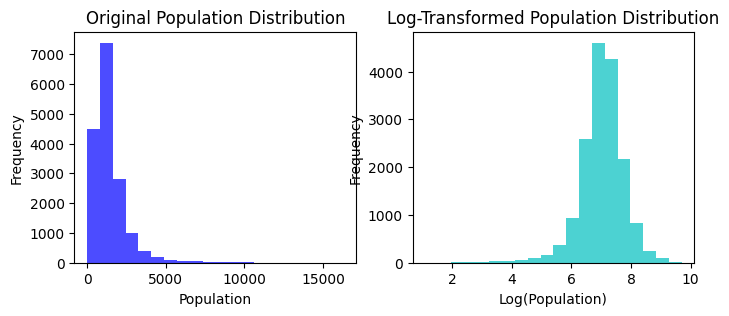

In [314]:

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Original data distribution
axes[0].hist(train["population"], bins=20, color='blue', alpha=0.7)
axes[0].set_title("Original Population Distribution")
axes[0].set_xlabel("Population")
axes[0].set_ylabel("Frequency")

# Log-transformed data distribution
axes[1].hist(loged, bins=20, color='c', alpha=0.7)
axes[1].set_title("Log-Transformed Population Distribution")
axes[1].set_xlabel("Log(Population)")
axes[1].set_ylabel("Frequency")

plt.show()

####  2 -  make a  special transformation using class method

In [315]:
## custom standard scaler
"""
BaseEstimator: Adds get_params() and set_params() for hyperparameter tuning.
TransformerMixin: Provides a default fit_transform() method.
"""
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
     self.with_mean = with_mean
    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!
    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
         X = X - self.mean_
        return X / self.scale_

In [316]:
stdClas=StandardScalerClone()
v=stdClas.fit_transform(train[['population']])
v

array([[ 0.13746004],
       [-0.69377062],
       [-0.78876841],
       ...,
       [ 1.26829911],
       [ 0.27356264],
       [-0.67915557]], shape=(16512, 1))

## Make a Pipeline (special transformations )

In [317]:
## when run this all estimator can be diagramed via calling the name of the estimator

from sklearn import set_config
set_config(display="diagram")

### 1- Pipeline

In [318]:
from sklearn.pipeline import Pipeline
pipl=Pipeline([("imputer",SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
pipl.fit_transform(train[['median_house_value']])


array([[ 2.18511202],
       [ 2.40625396],
       [-0.90740625],
       ...,
       [-0.49894408],
       [ 2.54675281],
       [ 0.23385961]], shape=(16512, 1))

In [319]:
pipl

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


### 2-make_pipeline
same as pipeline but witout naming

In [327]:
from sklearn.pipeline import make_pipeline
mkPL=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
housing_num_prepared=mkPL.fit_transform(train_num)
mkPL[0]
mkPL[1]

,copy,True
,with_mean,True
,with_std,True


In [332]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=mkPL.get_feature_names_out(),index=train_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13096,-1.423037,1.013606,1.861119,0.311912,1.366061,0.137460,1.394812,-0.936491,2.185112
14973,0.596394,-0.702103,0.907630,-0.308620,-0.438593,-0.693771,-0.373485,1.171942,2.406254
3785,-1.203098,1.276119,0.351428,-0.712240,-0.763478,-0.788768,-0.775727,-0.759789,-0.907406
14689,1.231216,-0.884924,-0.919891,0.702262,0.740005,0.383175,0.731375,-0.850281,-0.955971
20507,0.711362,-0.875549,0.589800,0.790125,1.593718,0.444376,1.755263,-0.180365,1.348242
...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.137663,-0.445315,0.060101,0.444041,2.546753
13105,0.131525,0.319822,-0.443146,0.139847,0.125806,-0.005950,0.083608,-0.685630,-1.019278
19301,1.256209,-1.428701,-1.237721,0.586026,0.559777,1.268299,0.679135,0.101049,-0.498944
19121,0.586397,-0.739605,0.669257,0.522417,0.792177,0.273563,0.882868,0.145396,2.546753


In [333]:
df_housing_num_prepared.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### 3-ColumnTranformer
##### the prevous pipelines support or handle just one type of data CTR will handle all data types once (combine more than one pipeline)

In [ ]:
from sklearn.compose import ColumnTransformer
num_pipeline=make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore'))

############ note there is  another method below  to choose coulmns names ##############
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]


preprocessing = ColumnTransformer([('numerical',num_pipeline,num_attribs),('categorical',cat_pipeline,cat_attribs)])
preprocessing

,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [338]:
preprocessing.fit_transform(train)

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]], shape=(16512, 13))

##### enhancing columnstransformer (instead of write features names manually)

In [340]:
#### instead of writing columns names mually we can use make_coulmn_selector and make_column_transform
from sklearn.compose import make_column_selector,make_column_transformer
preprocessing2=make_column_transformer(
                                        (num_pipeline,make_column_selector(dtype_include=np.number)) , 
                                        (cat_pipeline,make_column_selector(dtype_include=object))
                                      )

In [ ]:
housing_prepared=preprocessing2.fit_transform(houseFeatures)

In [347]:
housing_prepared  ### اعتماد

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]], shape=(16512, 14))

In [ ]:
feature_names = preprocessing2.get_feature_names_out()

X_train_prepared = pd.DataFrame(housing_prepared, columns=feature_names, index=train.index)
clean_names = [name.split("__")[-1] for name in feature_names] ## rename columns 
X_train_prepared.columns = clean_names


In [357]:
X_train_prepared ########################## اعتماد

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,2.185112,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,2.406254,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,-0.907406,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,-0.955971,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,1.348242,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,2.546753,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,-1.019278,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,-0.498944,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,2.546753,1.0,0.0,0.0,0.0,0.0


#### full data preprocessing (يتم كؤفه مؤقتا والعمل بداتا ال makecolumntransfer )

In [352]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
 def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state
 def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self  # always return self!
 def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
 def get_feature_names_out(self, names=None):
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [353]:
 def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
 def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out
 def ratio_pipeline():
    return make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=ratio_name),
    StandardScaler())
 log_pipeline = make_pipeline(
                                SimpleImputer(strategy="median"),
                                FunctionTransformer(np.log, feature_names_out="one-to-one"),
                                StandardScaler())
 cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
 default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

 preprocessing3 = ColumnTransformer([
            ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
            ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
            ("people_per_house", ratio_pipeline(), ["population", "households"]),
            ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
            "households", "median_income"]),
            ("geo", cluster_simil, ["latitude", "longitude"]),
            ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
            ],remainder=default_num_pipeline)  # one column remaining: housing_median_ag

# Model Selection 

### full new data splitting and prepare